# **Step 1 : Importing Libaries**

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
!pip install chardet
import chardet


*   Loading the dataset



In [286]:
with open ("mall_customer.csv","rb") as a:
  encoding=chardet.detect(a.read())['encoding']
df=pd.read_csv("mall_customer.csv",encoding=encoding)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Step 2: Exploratory Data Analysis**

In [287]:
df.shape

(200, 5)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [289]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [290]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [291]:
df['Gender']=df['Gender'].astype("category")
df['Gender']=df['Gender'].cat.codes
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


In [292]:
df.duplicated().sum()

0

In [293]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# **Step 2: Finding and removing Outliers if present**

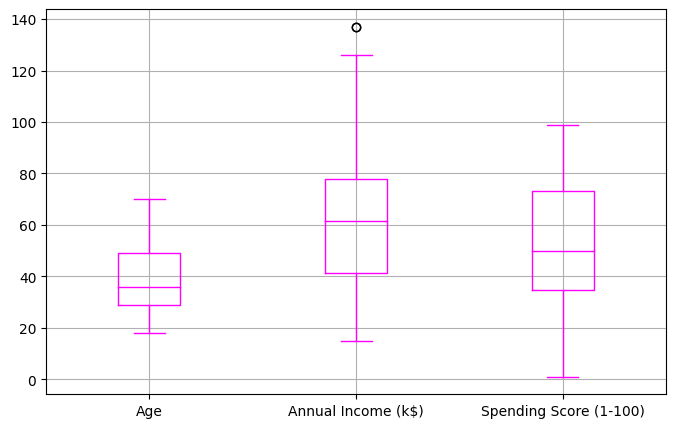

In [294]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].boxplot(figsize=(8,5),color='magenta')
plt.show()

In [295]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [296]:
df[df['Annual Income (k$)']>120]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


In [297]:
df.loc[df['Annual Income (k$)']>126, 'Annual Income (k$)']=126

In [298]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.450000,50.200000
std,0.497633,13.969007,25.964171,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,126.000000,99.000000


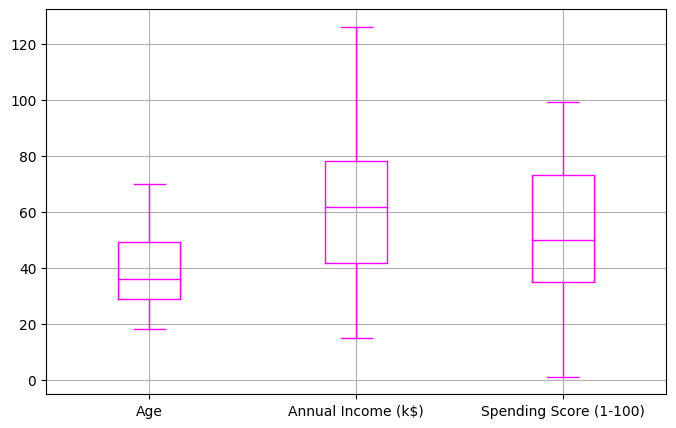

In [299]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].boxplot(figsize=(8,5),color='magenta')
plt.show()

# **Step 3 : Data Visualization**

<Figure size 1000x800 with 0 Axes>

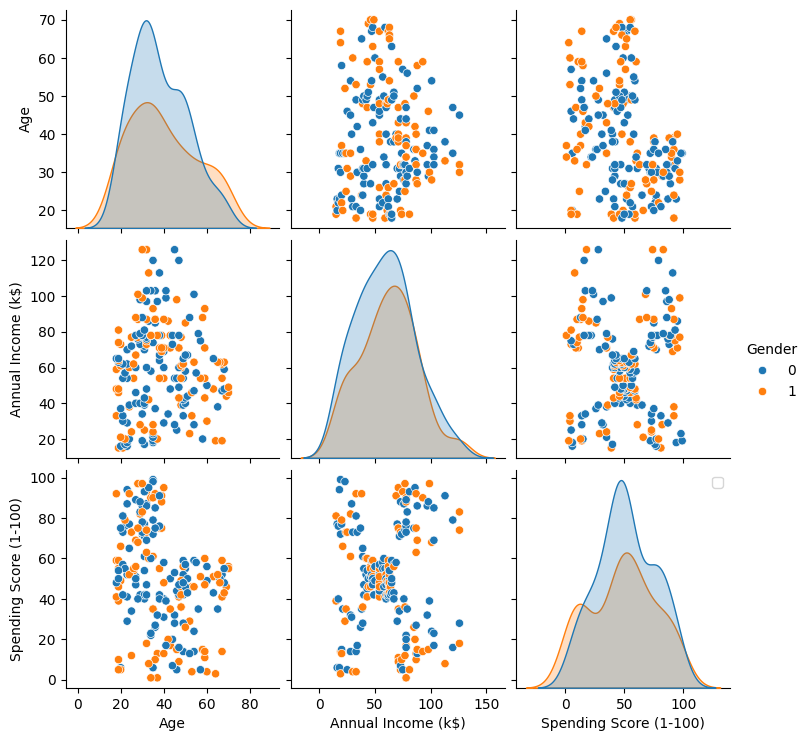

In [215]:
fig=plt.figure(figsize=(10,8))
sns.pairplot(df,hue='Gender')
plt.legend(loc='upper right')
plt.show()

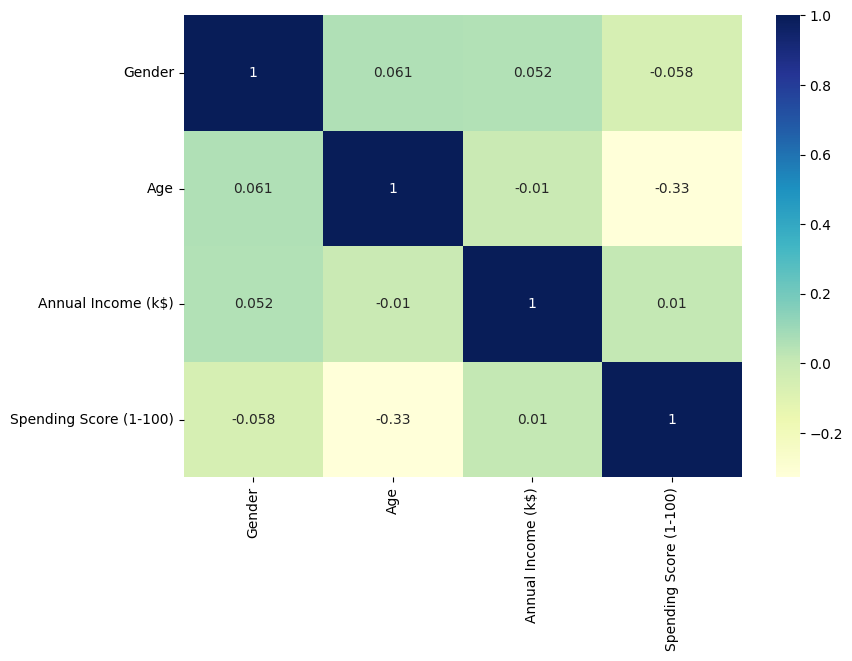

In [216]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

# **Step 3 : Modelling based on 2 parameters**


*   Spending score
*   Annual income





In [217]:
cols= df[['Spending Score (1-100)','Annual Income (k$)']]

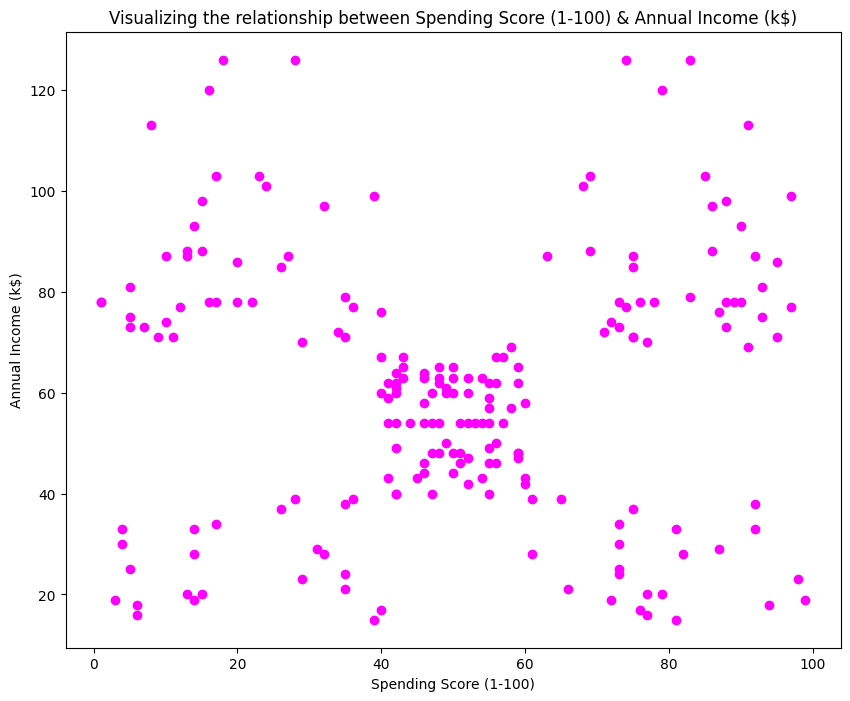

In [219]:
plt.figure(figsize=(10,8))
plt.scatter(cols.loc[:,'Spending Score (1-100)'],cols.loc[:,'Annual Income (k$)'],color='magenta')
plt.title('Visualizing the relationship between Spending Score (1-100) & Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [220]:
knn=KMeans()
y_pre=knn.fit_predict(cols)
print(y_pre)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 4 1 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 7 2 7 2 0 2 7 2 7 2 7 2 7 2 0 2 7 2 0 2
 7 2 7 2 7 2 7 2 7 2 7 2 0 2 7 2 7 2 7 2 7 2 7 2 7 2 7 2 7 2 7 2 5 6 5 6 5
 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


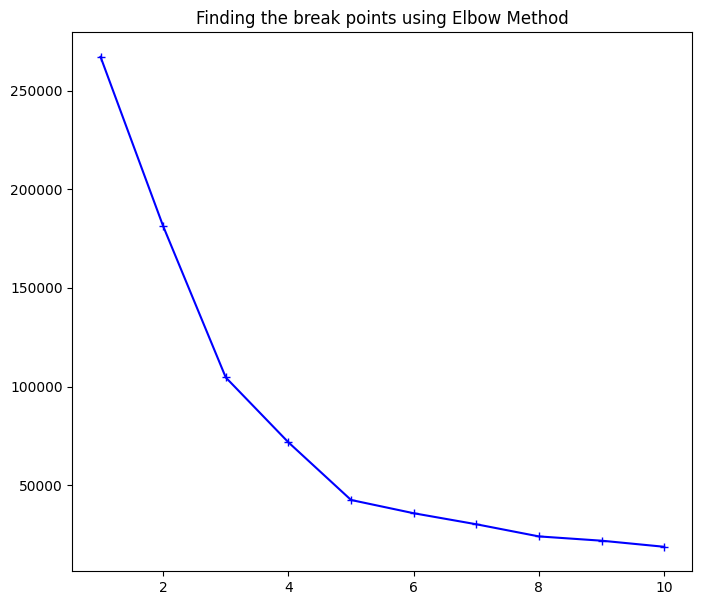

In [312]:
new=[]
for i in range(1,11):
   knn=KMeans(n_clusters=i,n_init=5).fit(cols)
   new.append(knn.inertia_)
plt.figure(figsize=(8,7))
plt.plot(range(1,11),new,marker='+',markerfacecolor='b',color='blue')
plt.title('Finding the break points using Elbow Method')
plt.show()

In [222]:
knn = KMeans(n_clusters=5)
y_pred1=knn.fit_predict(cols)
print(y_pred1)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [223]:
print(cols.var())

Spending Score (1-100)    666.854271
Annual Income (k$)        674.138191
dtype: float64


In [224]:
cols['cluster']=y_pred1
cols.head()

<ipython-input-224-65ef5814f98e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols['cluster']=y_pred1


,Spending Score (1-100),Annual Income (k$),cluster
0,39,15,0
1,81,15,4
2,6,16,0
3,77,16,4
4,40,17,0


In [225]:
y1=cols.iloc[:,-1]

In [226]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [227]:
col=['red','green','magenta','orange','yellow']

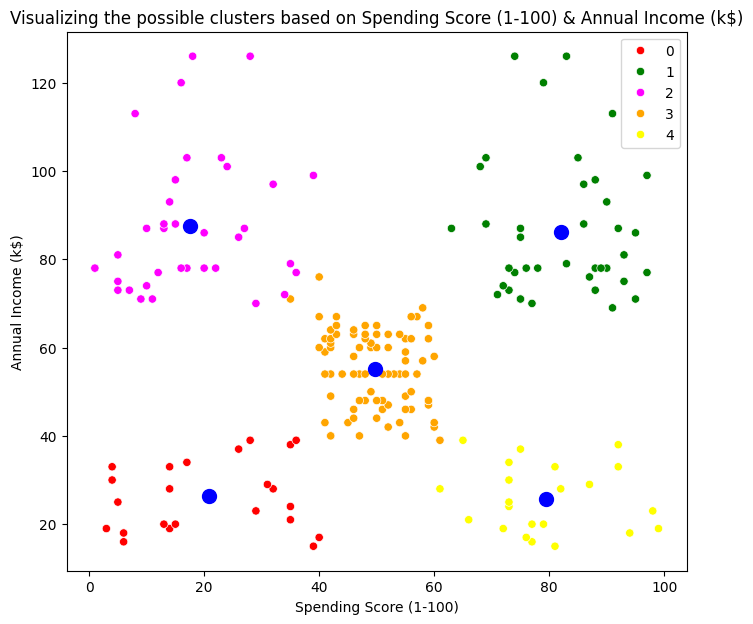

In [228]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Spending Score (1-100)',y='Annual Income (k$)',hue='cluster',data=cols,palette=col)
plt.legend(loc='upper right')
plt.scatter(knn.cluster_centers_[:,0],knn.cluster_centers_[:,1],s=100,c='blue')
plt.title('Visualizing the possible clusters based on Spending Score (1-100) & Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

<Figure size 1200x800 with 0 Axes>

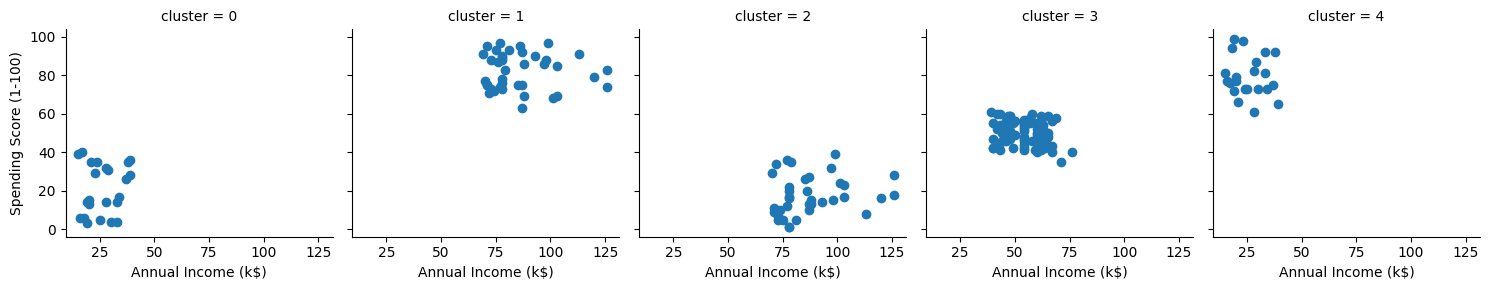

In [311]:
plt.figure(figsize=(12,8))
fns = sns.FacetGrid(cols,col='cluster',palette='coolwarm')
fns.map(plt.scatter,'Annual Income (k$)','Spending Score (1-100)')
plt.show()

# **Visualizing the possible clusters seperately**

# **Step 3 : Modelling based on 3 parameters**


*   Spending score
*   Annual income
*   Age







In [229]:
cols2= df[['Spending Score (1-100)','Annual Income (k$)','Age']]

In [230]:
cols2

,Spending Score (1-100),Annual Income (k$),Age
0,39,15,19
1,81,15,21
2,6,16,20
3,77,16,23
4,40,17,31
...,...,...,...
195,79,120,35
196,28,126,45
197,74,126,32
198,18,126,32


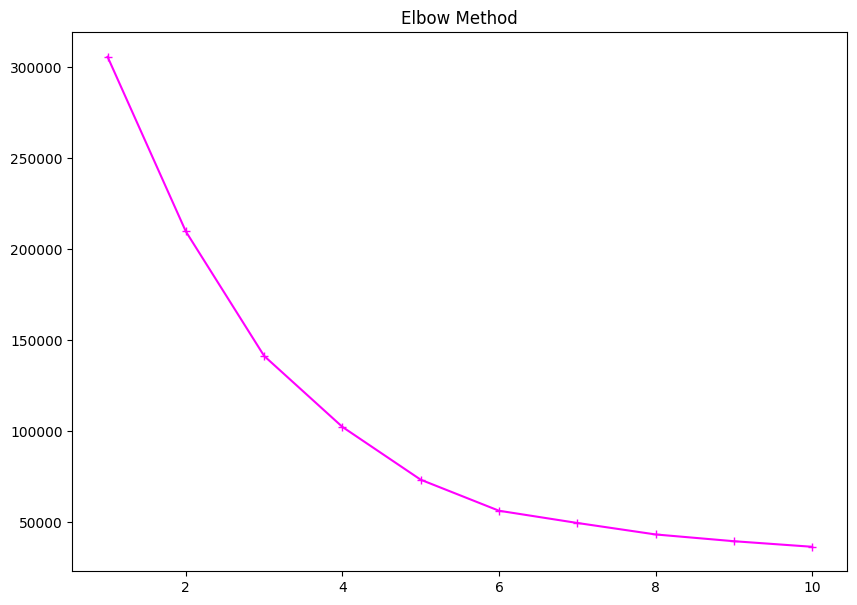

In [231]:
new=[]
for i in range(1,11):
  knn=KMeans(n_clusters=i,n_init=5).fit(cols2)
  new.append(knn.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),new,marker='+',markerfacecolor='b',color='magenta')
plt.title('Elbow Method')
plt.show()

In [232]:
knn = KMeans(n_clusters=5)
y_pred=knn.fit_predict(cols2)
#y_pred=knn.predict(cols)
print(y_pred)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [233]:
cols2.var()

Spending Score (1-100)    666.854271
Annual Income (k$)        674.138191
Age                       195.133166
dtype: float64

In [234]:
cols2['cluster']=y_pred
cols2.head()

,Spending Score (1-100),Annual Income (k$),Age,cluster
0,39,15,19,2
1,81,15,21,4
2,6,16,20,2
3,77,16,23,4
4,40,17,31,2


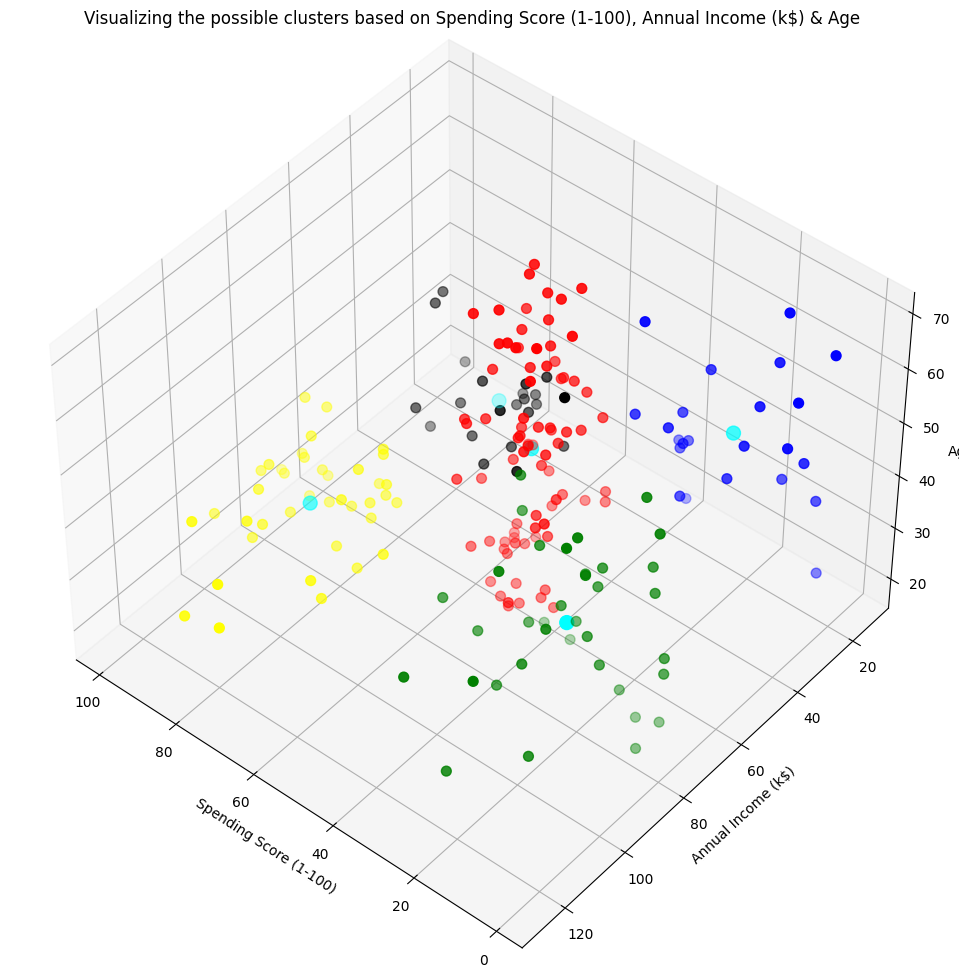

In [235]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(cols2.iloc[y_pred==0,0],cols2.iloc[y_pred==0,1],cols2.iloc[y_pred==0,2],s=50,c='red')
ax.scatter(cols2.iloc[y_pred==1,0],cols2.iloc[y_pred==1,1],cols2.iloc[y_pred==1,2],s=50,c='green')
ax.scatter(cols2.iloc[y_pred==2,0],cols2.iloc[y_pred==2,1],cols2.iloc[y_pred==2,2],s=50,c='blue')
ax.scatter(cols2.iloc[y_pred==3,0],cols2.iloc[y_pred==3,1],cols2.iloc[y_pred==3,2],s=50,c='yellow')
ax.scatter(cols2.iloc[y_pred==4,0],cols2.iloc[y_pred==4,1],cols2.iloc[y_pred==4,2],s=50,c='black')
ax.scatter(knn.cluster_centers_[:,0],knn.cluster_centers_[:,1],knn.cluster_centers_[:,2],s=100,c='cyan')
ax.view_init(elev=45,azim=130)
plt.title('Visualizing the possible clusters based on Spending Score (1-100), Annual Income (k$) & Age')
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Age')
plt.show()

<Figure size 1200x800 with 0 Axes>

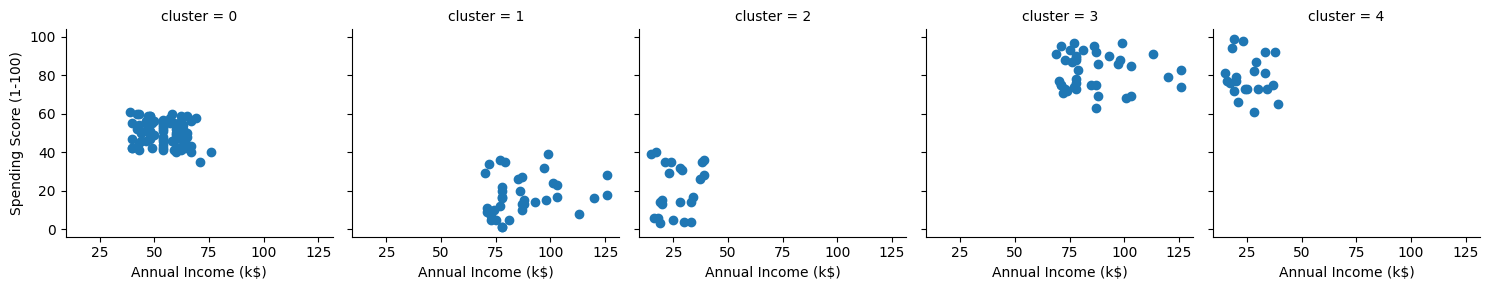

In [308]:
plt.figure(figsize=(12,8))
fns = sns.FacetGrid(cols2,col='cluster',palette='coolwarm')
fns.map(plt.scatter,'Annual Income (k$)','Spending Score (1-100)')
plt.show()

# **Visualizing the possible clusters seperately**

In [236]:
cols2_col=cols2.iloc[:,0:3]
cols_col=cols.iloc[:,0:2]

# Checking important parameters through var() for creating clusters  

In [237]:
variance=pd.DataFrame({
    'spending_score':[cols2_col['Spending Score (1-100)'].var(),cols_col['Spending Score (1-100)'].var()],
    'annual_income':[cols2_col['Annual Income (k$)'].var(),cols_col['Annual Income (k$)'].var()],
    'age':[cols2_col['Age'].var(),0]
})
variance.head()

,spending_score,annual_income,age
0,666.854271,674.138191,195.133166
1,666.854271,674.138191,0.000000


In [238]:
variance.index=['3 param','2 param']
variance.head()

,spending_score,annual_income,age
3 param,666.854271,674.138191,195.133166
2 param,666.854271,674.138191,0.000000


<ipython-input-239-361e3df493fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance.index,y=variance['spending_score'],palette='deep',legend=False)


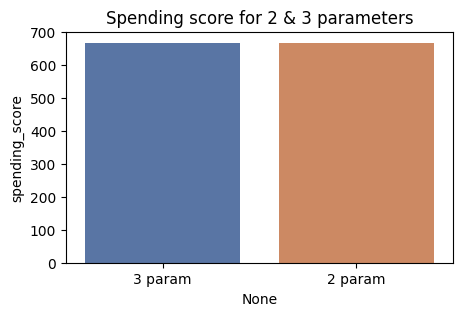

<ipython-input-239-361e3df493fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance.index,y=variance['annual_income'],palette='magma',legend=False)


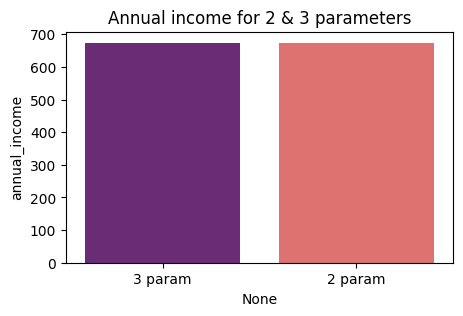

<ipython-input-239-361e3df493fd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance.index,y=variance['age'],palette='coolwarm',legend=False)


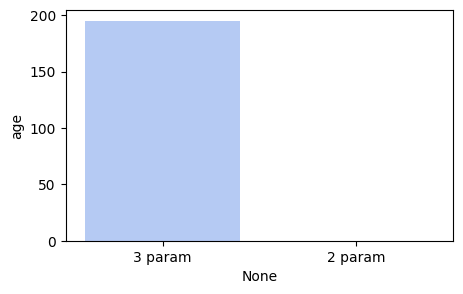

In [239]:
fig= plt.figure(figsize=(5,3))
sns.barplot(x=variance.index,y=variance['spending_score'],palette='deep',legend=False)
plt.title('Spending score for 2 & 3 parameters')
plt.show()
fig= plt.figure(figsize=(5,3))
sns.barplot(x=variance.index,y=variance['annual_income'],palette='magma',legend=False)
plt.title('Annual income for 2 & 3 parameters')
plt.show()
fig= plt.figure(figsize=(5,3))
sns.barplot(x=variance.index,y=variance['age'],palette='coolwarm',legend=False)
plt.show()

In [240]:
y=cols2.iloc[:,-1]

In [241]:
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        22

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

